       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

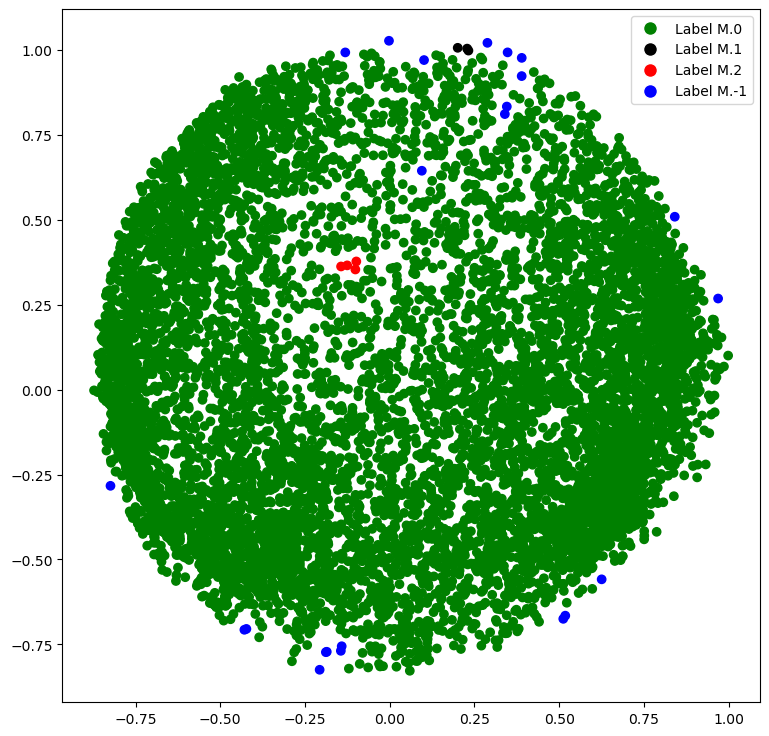

In [2]:
# Step 1: Importing all the required libraries
import numpy as nmp
import pandas as pds
import matplotlib.pyplot as pplt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

# Step 2: Loading the data
# Load the dataset into a pandas DataFrame
M = pds.read_csv('Sample Dataset.csv')  # Specify the correct dataset path

# Drop the 'CUST_ID' column as it's not needed for clustering
M = M.drop('CUST_ID', axis=1)

# Handle missing values by forward filling
M.fillna(method='ffill', inplace=True)

# Display the first 5 rows of the dataset
print(M.head())

# Step 3: Preprocessing the data
# Initialize the StandardScaler and scale the dataset
scalerFD = StandardScaler()
M_scaled = scalerFD.fit_transform(M)

# Normalize the scaled data to ensure it follows a Gaussian distribution
M_normalized = normalize(M_scaled)

# Convert the normalized data (numpy array) back into a pandas DataFrame
M_normalized = pds.DataFrame(M_normalized)

# Step 4: Reduce the dimensionality of the data
# Initialize PCA to reduce data to 2 principal components
pcaFD = PCA(n_components=2)
M_principal = pcaFD.fit_transform(M_normalized)

# Convert the PCA-transformed data into a pandas DataFrame
M_principal = pds.DataFrame(M_principal, columns=['C1', 'C2'])

# Display the first 5 rows of the PCA-transformed data
print(M_principal.head())

# Step 5: Build a clustering model
# Create a DBSCAN clustering model with specified parameters
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(M_principal)

# Extract cluster labels from the model
labeling = db_default.labels_

# Step 6: Visualize the clustering model
# Define colors for different clusters
colours = {
    0: 'g',  # Green
    1: 'k',  # Black
    2: 'r',  # Red
    -1: 'b'  # Blue (outliers)
}

# Map each data point to its corresponding cluster color
cvec = [colours[label] for label in labeling]

# Scatter plot for cluster visualization
pplt.figure(figsize=(9, 9))  # Set figure size
pplt.scatter(M_principal['C1'], M_principal['C2'], c=cvec)  # Plot data points

# Add legend to the plot
legend_labels = ('Label M.0', 'Label M.1', 'Label M.2', 'Label M.-1')
legend_colors = [colours[0], colours[1], colours[2], colours[-1]]
pplt.legend(handles=[
    pplt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors
], labels=legend_labels)

# Show the visualization
pplt.show()
